First 5 rows:
      Year Format  Innings   Runs   Balls  Outs   Avg    SR     HS   50  100  \
0  2005.0   Test      5.0  149.0   199.0   4.0  37.2  74.9   51.0  1.0  0.0   
1  2006.0   Test     19.0  557.0   778.0  19.0  29.3  71.6  148.0  2.0  1.0   
2  2007.0   Test     13.0  468.0   690.0   9.0    52  67.8   92.0  5.0  0.0   
3  2008.0   Test     19.0  633.0  1206.0  18.0  35.2  52.5   92.0  6.0  0.0   
4  2009.0   Test      6.0  369.0   623.0   4.0  92.2  59.2  110.0  2.0  2.0   

     4s    6s  Dot %  
0  20.0   2.0   64.3  
1  76.0  12.0   69.5  
2  52.0  10.0   65.7  
3  60.0   8.0   72.4  
4  34.0   8.0   69.7   

Columns: ['Year', 'Format', 'Innings', 'Runs', 'Balls', 'Outs', 'Avg', 'SR', 'HS', '50', '100', '4s', '6s', 'Dot %']


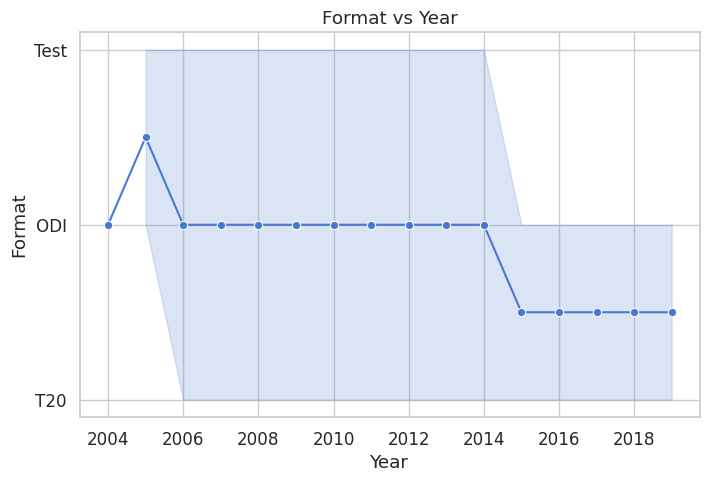

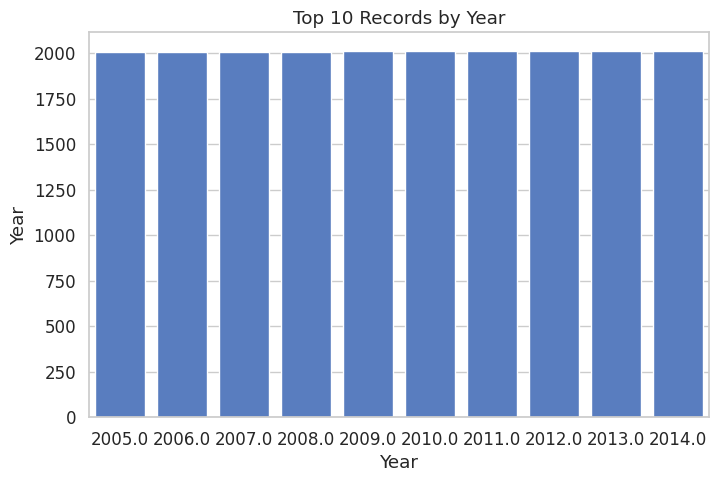

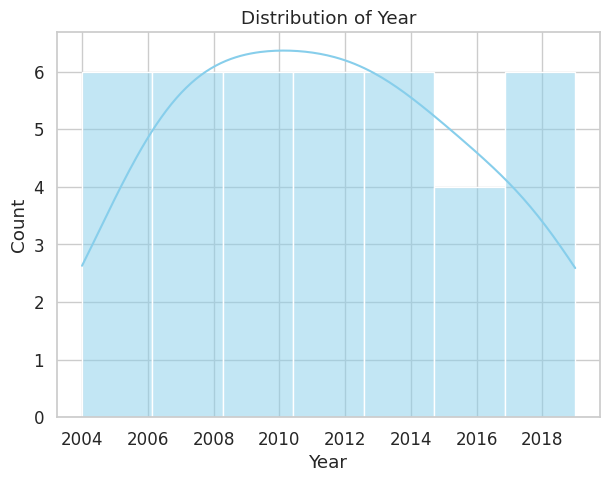

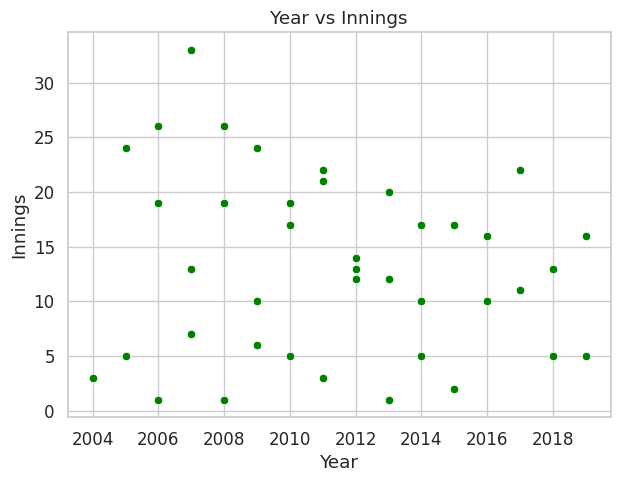

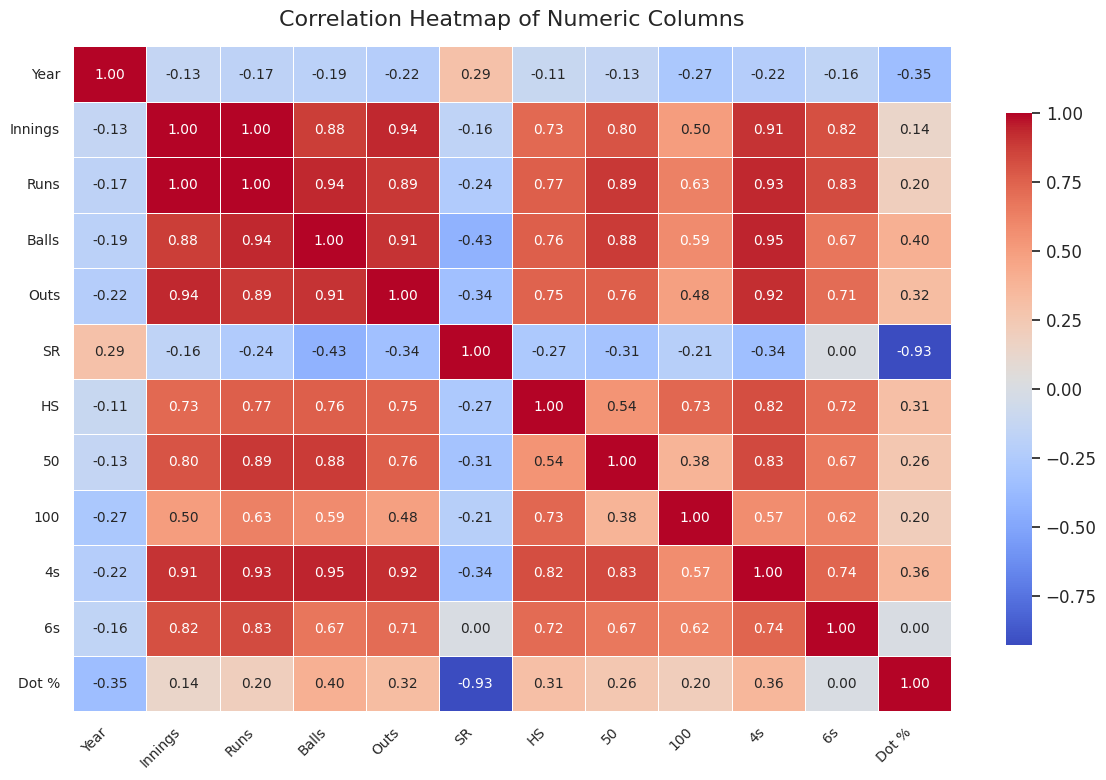

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Excel file
df = pd.read_excel("ms dhoni.xlsx")

df.columns = df.columns.map(str)

print("First 5 rows:\n", df.head(), "\n")
print("Columns:", list(df.columns))

# Use Seaborn style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Line Plot (using Seaborn)
plt.figure(figsize=(8,5))
sns.lineplot(x=df.columns[0], y=df.columns[1], data=df, marker='o')
plt.title(f"{df.columns[1]} vs {df.columns[0]}")
plt.show()

# 2. Bar Chart
plt.figure(figsize=(8,5))
sns.barplot(x=df.columns[0], y=df.select_dtypes(include='number').columns[0], data=df.head(10))
plt.title("Top 10 Records by " + df.select_dtypes(include='number').columns[0])
plt.show()

# 3. Histogram / KDE Plot
num_col = df.select_dtypes(include='number').columns[0]
plt.figure(figsize=(7,5))
sns.histplot(df[num_col], kde=True, color="skyblue")
plt.title(f"Distribution of {num_col}")
plt.show()

# 4. Scatter Plot
num_cols = df.select_dtypes(include='number').columns
if len(num_cols) >= 2:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=num_cols[0], y=num_cols[1], data=df, color="green")
    plt.title(f"{num_cols[0]} vs {num_cols[1]}")
    plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(12,8))  # make it wider and taller
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={'size': 10},   # adjust annotation font size
    linewidths=0.5,           # add lines between cells
    cbar_kws={'shrink': 0.8}  # shrink color bar slightly
)
plt.title("Correlation Heatmap of Numeric Columns", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

